In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [114]:
data = pd.read_csv('nyc_real_estate.csv', index_col=False)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387 entries, 0 to 386
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       387 non-null    int64 
 1   Name             387 non-null    object
 2   City             387 non-null    object
 3   Neighbourhood    387 non-null    object
 4   Price            387 non-null    object
 5   Year Built       387 non-null    object
 6   Beds             387 non-null    object
 7   Baths            387 non-null    object
 8   Area             387 non-null    object
 9   Price(per sqft)  387 non-null    object
 10  A/C              387 non-null    object
dtypes: int64(1), object(10)
memory usage: 33.4+ KB


In [116]:
data = data.drop(labels = ['Unnamed: 0'], axis = 1)

In [117]:
data = data.replace("Null", pd.NA).dropna()

In [118]:
data['Price'] = data['Price'].str.replace('$', '')

/var/folders/bm/7gfzqmk92w7f0g15qhnh3_1h0000gn/T/ipykernel_24099/813483522.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$', '')


In [119]:
data['Baths'] = data['Baths'].str.replace('Baths', '')

In [120]:
data['Baths'] = data['Baths'].str.replace('Bath', '')

In [121]:
data['Year Built'] = data['Year Built'].apply(lambda x : x[-4:])

In [122]:
data['Beds'] = data['Beds'].apply(lambda x : x[0])
data['Beds'] = data['Beds'].replace('S', 0.5)

In [123]:
data

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area,Price(per sqft),A/C
1,37-26 32nd St #5K,"Long Island City, NY 11101",Astoria,"620,000",2022,0.5,1,441 sqft,"$1,406",Cooling only
2,37-26 32nd St #3G,"Long Island City, NY 11101",Astoria,"730,000",2022,1,1,579 sqft,"$1,261",Cooling only
3,37-26 32nd St #6L,"Long Island City, NY 11101",Astoria,"570,000",2022,0.5,1,429 sqft,"$1,329",Cooling only
4,37-26 32nd St #3H,"Long Island City, NY 11101",Astoria,"695,000",2022,1,1,632 sqft,"$1,100",No
6,2736 Independence Ave #6J,"Bronx, NY 10463",Spuyten Duyvil,"235,995",1970,1,1,850 sqft,$278,No
...,...,...,...,...,...,...,...,...,...,...
379,1619 3rd Ave #3B,"New York, NY 10128",Upper East Side,"635,000",1975,0.5,1,528 sqft,"$1,203",Cooling only
381,43 Joralemon St,"Brooklyn, NY 11201",Brooklyn Heights,"4,500,000",1845,5,6,"3,192 sqft","$1,410",No
382,195 Classon Ave #5,"Brooklyn, NY 11205",Bedford Stuyvesant,"1,395,000",2008,2,2,"1,185 sqft","$1,177",No
384,410 Maryland Ave #1C,"Staten Island, NY 10305",Rosebank,"279,900",1974,2,1,"1,100 sqft",$254,Heating & Cooling


## What is the distribution of property types & pricing in New York?

## Is there a correlation between the number of bedrooms and property price?

In [124]:
data['Price'] = data['Price'].str.replace(',', '').astype(int)
data['Beds'] = data['Beds'].apply(lambda x: int(x))

In [125]:
olsreg = ols('Price ~ Beds', data=data).fit()
olsreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.285
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     99.46
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           6.30e-20
Time:                        12:13:52   Log-Likelihood:                -3740.0
No. Observations:                 251   AIC:                             7484.
Df Residuals:                     249   BIC:                             7491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    4.29e+05   7.02e+04      6.113      0.000    2.91e+05    5.67e+05
Beds        2.828e+05   2.84e+04      9.973      0.000    2.27e+05    3.39e+05
==============================================================================
Omnibus:                      106.656   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              410.887
Skew:                           1.775   Prob(JB):                     5.98e-90
Kurtosis:                       8.166   Cond. No.                         4.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
r_squared = olsreg.rsquared
p_value = olsreg.f_pvalue

r_squared, p_value

(0.2854370344509515, 6.301769648197888e-20)

INTERPRETATION OF ABOVE: #OLS Regression - look for evidence of statistically significant correlation between bedrooms and property price

Text(463.154761904762, 0.5, 'Price ($)')

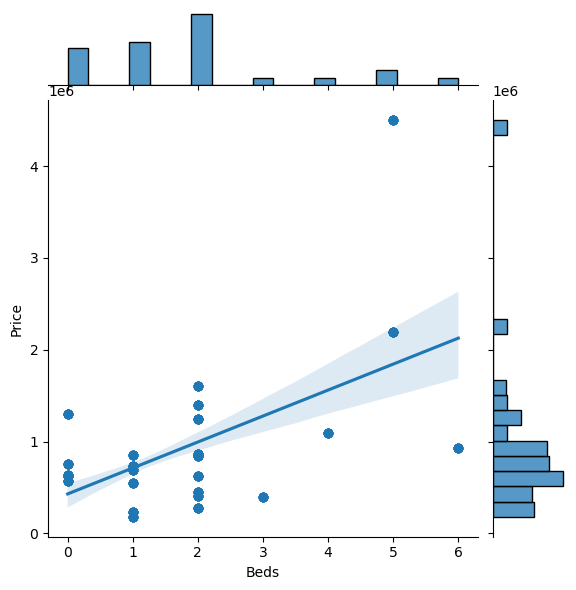

In [143]:
jg = sns.JointGrid(x="Beds", y="Price", data=data)
jg.plot(sns.regplot, sns.histplot)
plt.xlabel("Number of Beds")
plt.ylabel("Price ($)")

In [144]:
infl = olsreg.get_influence()
sm_fr = infl.summary_frame()
sm_fr
#SHOWs how many influence points are there for the above Q, according to statistically significant Cook's distances?



,dfb_Intercept,dfb_Beds,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
1,0.026136,-0.019939,0.000343,0.266923,0.009531,0.026184,0.266424,0.026136
2,0.001716,-0.000890,0.000002,0.025390,0.005212,0.001838,0.025339,0.001834
3,0.019291,-0.014717,0.000187,0.197035,0.009531,0.019329,0.196654,0.019291
4,-0.001583,0.000821,0.000001,-0.023425,0.005212,-0.001696,-0.023378,-0.001692
6,-0.044887,0.023288,0.001154,-0.663607,0.005212,-0.048033,-0.662860,-0.047979
...,...,...,...,...,...,...,...,...
379,0.028189,-0.021505,0.000399,0.287889,0.009531,0.028241,0.287358,0.028189
381,-0.204404,0.474961,0.135198,3.732022,0.019044,0.519996,3.833272,0.534104
382,0.020917,0.002457,0.000626,0.558166,0.004003,0.035388,0.557393,0.035338
384,-0.037382,-0.004391,0.001994,-0.996139,0.004003,-0.063155,-0.996123,-0.063154



INTERPRETATIONS: Regression Plot - visualize our regression results with a scatterplot and a line of best fit to graphically display correlation


## How does property price (price/sqft) vary across different neighborhoods in New York?

## Does the presence of amenities (like air conditioning) have a statistically significant impact on property prices in New York?

In [129]:
data = data.rename(columns={'A/C': 'Air_Condition'})


In [130]:
def convert_condition(value):
    if value == 'No':
        return 0
    elif value == 'Cooling only':
        return 1
    else:
        return 2

In [131]:
data['Air_Condition'] = data['Air_Condition'].apply(convert_condition)
# convert air condition to numeric values with 0 representing no, 1 representing cooling, and 2 representing heating and cooling

In [132]:
data

,Name,City,Neighbourhood,Price,Year Built,Beds,Baths,Area,Price(per sqft),Air_Condition
1,37-26 32nd St #5K,"Long Island City, NY 11101",Astoria,620000,2022,0,1,441 sqft,"$1,406",1
2,37-26 32nd St #3G,"Long Island City, NY 11101",Astoria,730000,2022,1,1,579 sqft,"$1,261",1
3,37-26 32nd St #6L,"Long Island City, NY 11101",Astoria,570000,2022,0,1,429 sqft,"$1,329",1
4,37-26 32nd St #3H,"Long Island City, NY 11101",Astoria,695000,2022,1,1,632 sqft,"$1,100",0
6,2736 Independence Ave #6J,"Bronx, NY 10463",Spuyten Duyvil,235995,1970,1,1,850 sqft,$278,0
...,...,...,...,...,...,...,...,...,...,...
379,1619 3rd Ave #3B,"New York, NY 10128",Upper East Side,635000,1975,0,1,528 sqft,"$1,203",1
381,43 Joralemon St,"Brooklyn, NY 11201",Brooklyn Heights,4500000,1845,5,6,"3,192 sqft","$1,410",0
382,195 Classon Ave #5,"Brooklyn, NY 11205",Bedford Stuyvesant,1395000,2008,2,2,"1,185 sqft","$1,177",0
384,410 Maryland Ave #1C,"Staten Island, NY 10305",Rosebank,279900,1974,2,1,"1,100 sqft",$254,2


In [133]:
#multiple amenities including Bed, Bath, and Air Conditioning

In [134]:
ny_lm = ols('Price ~ Air_Condition + Baths + Beds', data=data).fit()
table = sm.stats.anova_lm(ny_lm, typ=2)
table

,sum_sq,df,F,PR(>F)
Baths,9.030793e+13,5.0,208.057162,1.159443e-85
Air_Condition,1.644508e+12,1.0,18.943606,1.984394e-05
Beds,3.658383e+12,1.0,42.142083,4.735769e-10
Residual,2.109500e+13,243.0,NaN,NaN


In [135]:
data['Baths'] = data['Baths'].apply(lambda x: int(x))

In [136]:
med_am = data.groupby('Neighbourhood')[['Air_Condition', 'Baths', 'Beds']].median()
med_am

,Air_Condition,Baths,Beds
Neighbourhood,,,
Astoria,1.0,1.0,0.5
Battery Park,0.0,1.0,1.0
Baychester,2.0,2.0,2.0
Bedford Stuyvesant,1.0,3.0,3.5
Brooklyn Heights,0.0,6.0,5.0
Canarsie,2.0,4.0,6.0
Flushing,0.0,2.0,2.0
Gravesend,1.0,2.0,2.0
Heartland Village,2.0,2.0,2.0


ANOVA LM - analyze the amenity variables against property price while normalizing for different neighborhoods
Pair plot - Graph out each specific amenity’s impact on property pricing in NY


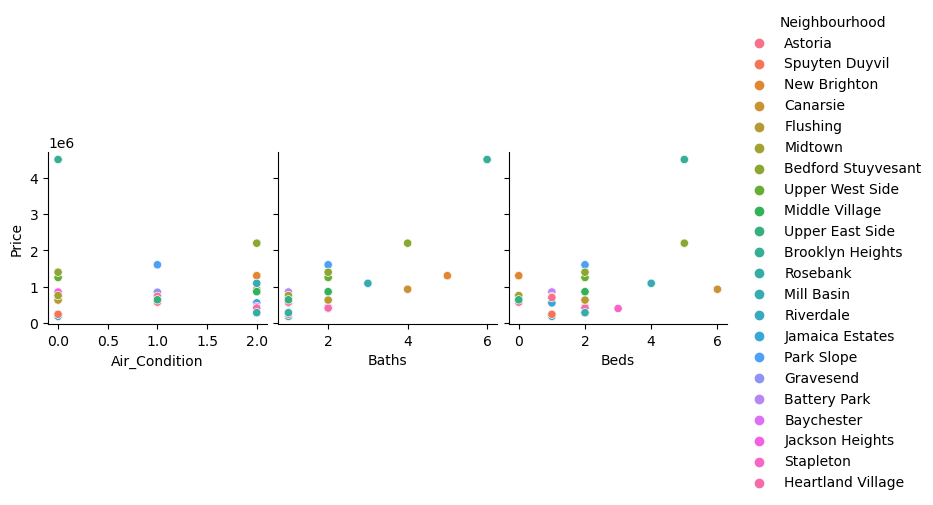

In [137]:
sns.pairplot(
    data, hue='Neighbourhood',
    x_vars=["Air_Condition", "Baths", "Beds"],
    y_vars=["Price"])

In [70]:
#Pair plot - Graph out each specific amenity’s impact on property pricing in NY
